In [1]:
#            Science of Decisions
#     Interactive Stroop Effect Experiment

#     Analysis Results for Udacity P1 Study

# Prepared by:  Laurie S. Reynolds


In [3]:
# Read in the data and display as a table


# Some initial imports and settings
%matplotlib inline

from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math as math
import scipy.stats as stats

np.set_printoptions(suppress=True)

# Read in the data and display as a table
stroopData = pd.read_csv('/home/laurie/udacity/P1/stroopdata-differences.csv')

stroopData


,Participant,Congruent,Incongruent,Difference
0,P-100,12.079,19.278,7.199
1,P-101,16.791,18.741,1.950
2,P-102,9.564,21.214,11.650
3,P-103,8.630,15.687,7.057
4,P-104,14.669,22.803,8.134
5,P-105,12.238,20.878,8.640
6,P-106,14.692,24.572,9.880
7,P-107,8.987,17.394,8.407
8,P-108,9.401,20.762,11.361
9,P-109,14.480,26.282,11.802


In [4]:
# Data is not displaying correctly as numbers, verify check the data was imported as floats
stroopData.dtypes

Participant     object
Congruent      float64
Incongruent    float64
Difference     float64
dtype: object

In [5]:
# Calculate the percentage difference

stroopData['Percent Diff'] = (stroopData['Difference'] / stroopData['Congruent'] ) * 100

# display the data formatted correctly
print (stroopData.to_string (justify='right', index=False))

Participant  Congruent  Incongruent  Difference  Percent Diff
      P-100     12.079       19.278       7.199     59.599305
      P-101     16.791       18.741       1.950     11.613364
      P-102      9.564       21.214      11.650    121.810958
      P-103      8.630       15.687       7.057     81.772885
      P-104     14.669       22.803       8.134     55.450269
      P-105     12.238       20.878       8.640     70.599771
      P-106     14.692       24.572       9.880     67.247482
      P-107      8.987       17.394       8.407     93.546233
      P-108      9.401       20.762      11.361    120.848846
      P-109     14.480       26.282      11.802     81.505525
      P-110     22.328       24.524       2.196      9.835185
      P-111     15.298       18.644       3.346     21.872140
      P-112     15.073       17.510       2.437     16.167982
      P-113     16.929       20.330       3.401     20.089787
      P-114     18.200       35.255      17.055     93.708791
      P-

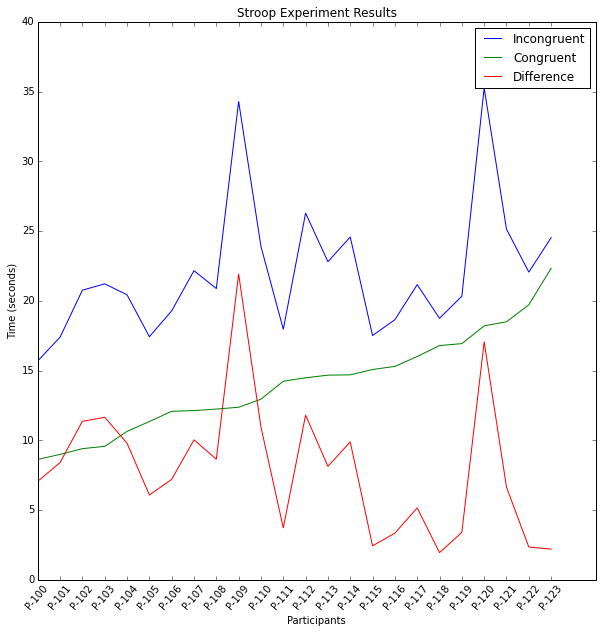

In [9]:
# Plot the results sorted by Congruent

# Initialize the plots
fig, ax = plt.subplots(1,1,figsize=(10,10))

# Sort the data by Congruent column
stroopSorted = stroopData.sort_values(['Congruent', 'Incongruent', 'Difference', 'Participant', 'Percent Diff'],  ascending=[1, 0, 0, 0,0])

# Create plots for the Incongruent, Confgruent and Difference data
incongruentPlot = plt.plot(stroopSorted['Incongruent'], label='Incongruent')
congruentPlot = plt.plot(stroopSorted['Congruent'], label='Congruent')
differencePlot = plt.plot(stroopSorted['Difference'], label='Difference')

# Label the Axes and Title the graph
plt.xlabel('Participants')
plt.ylabel('Time (seconds)')
plt.title('Stroop Experiment Results')

# Use Participant for the x axis tick markers
count = stroopSorted['Congruent'].count()
index = np.arange(count)
plt.xticks(index, stroopSorted['Participant'])
plt.xticks(rotation=50)

# add a legend
plt.legend()

plt.show()

In [8]:
# Cacluatle descriptive statistics

# Assign column data to variables
participantCol = stroopData['Participant']
incongruentCol = stroopData['Incongruent']
differenceCol = stroopData['Difference']
congruentCol = stroopData['Congruent']
percentDiffCol = stroopData['Percent Diff']

descriptiveStats = pd.DataFrame( columns=['Congruent','Incongruent','Difference', 'Percent Diff'], index=['count', 'mean', 'median', 'min', 'max', 'std', 'se'])


# Calculate statistics
def calcStats(columnName, columnData) :
    
    descriptiveStats[columnName]['count'] = columnData.count()
    descriptiveStats[columnName]['mean'] = columnData.mean()
    descriptiveStats[columnName]['median'] = columnData.median()
    descriptiveStats[columnName]['min'] = columnData.min()
    descriptiveStats[columnName]['max'] = columnData.max()
    descriptiveStats[columnName]['std'] = stats.tstd(columnData)
    descriptiveStats[columnName]['se'] = stats.sem(columnData)
    

# Fill in the table
calcStats('Congruent', congruentCol)
calcStats('Incongruent', incongruentCol)
calcStats('Difference', differenceCol)
calcStats('Percent Diff', percentDiffCol)
    

# Print out the results
descriptiveStats



,Congruent,Incongruent,Difference,Percent Diff
count,24,24,24,24
mean,14.0511,22.0159,7.96479,63.4162
median,14.3565,21.0175,7.6665,63.4234
min,8.63,15.687,1.95,9.83518
max,22.328,35.255,21.919,177.209
std,3.55936,4.79706,4.86483,42.3156
se,0.726551,0.979195,0.993029,8.63764


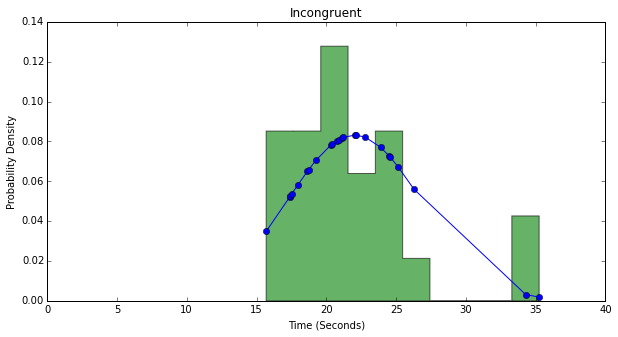

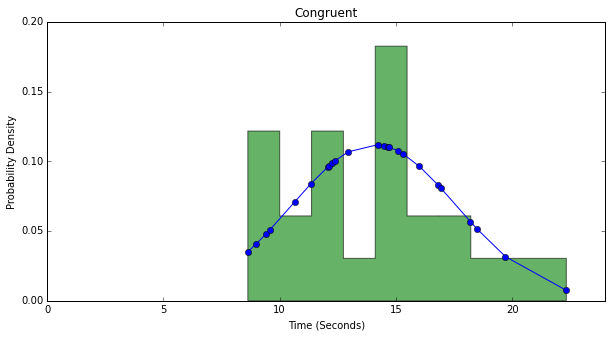

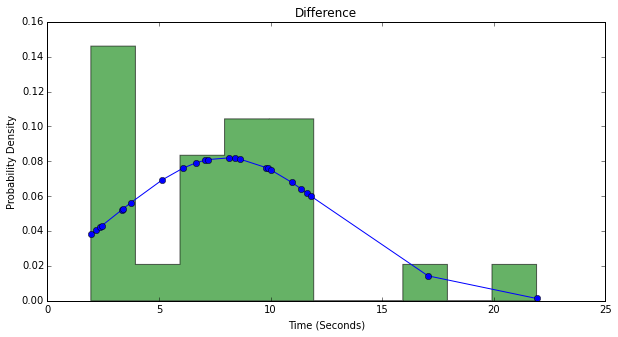

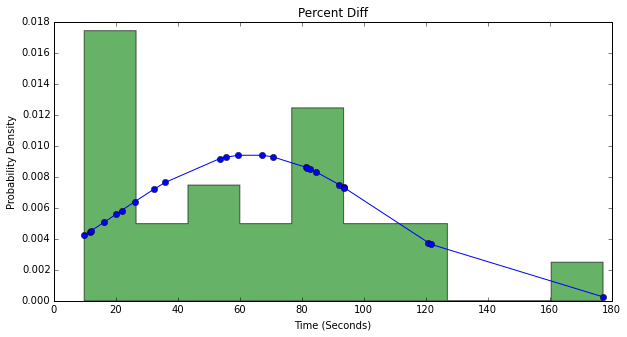

In [123]:
def drawPlot(columnData, colIndex, rowIndex1, rowIndex2, title):
    sortedData = sorted(columnData)

    fig, ax = plt.subplots(1,1,figsize=(10,5))

    fit = stats.norm.pdf(sortedData, descriptiveStats[colIndex][rowIndex1], descriptiveStats[colIndex][rowIndex2])  #this is a fitting indeed

    plt.plot(sortedData,fit,'-o')

    ax.set_xlim(xmin=0)

    plt.hist(sortedData,normed=True, histtype='stepfilled', alpha=0.6)     
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Probability Density')
    plt.title(title)
    plt.show() 

    
drawPlot(incongruentCol, 'Incongruent', 'mean', 'std', 'Incongruent')
drawPlot(congruentCol, 'Congruent', 'mean', 'std', 'Congruent')
drawPlot(differenceCol, 'Difference', 'mean', 'std', 'Difference')
drawPlot(percentDiffCol, 'Percent Diff', 'mean', 'std', 'Percent Diff')



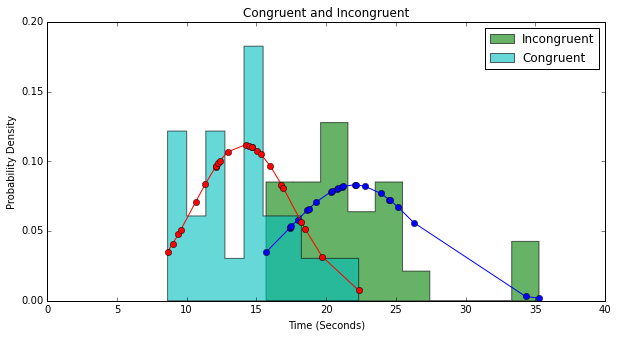

In [135]:
 fig, ax = plt.subplots(1,1,figsize=(10,5))
    
def drawPlot(columnData, colIndex, rowIndex1, rowIndex2, labelName):
    sortedData = sorted(columnData)

    fit = stats.norm.pdf(sortedData, descriptiveStats[colIndex][rowIndex1], descriptiveStats[colIndex][rowIndex2])  #this is a fitting indeed

    plt.plot(sortedData,fit,'-o')

    ax.set_xlim(xmin=0)

    plt.hist(sortedData,normed=True, histtype='stepfilled', alpha=0.6, label=labelName)     
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Probability Density')
   
   

plt.title('Congruent and Incongruent')
drawPlot(incongruentCol, 'Incongruent', 'mean', 'std', 'Incongruent')
drawPlot(congruentCol, 'Congruent', 'mean', 'std', 'Congruent')

plt.legend()
plt.show() 

In [132]:
# Calculate the t statistic

tstatistic, pvalue = stats.ttest_rel(incongruentCol,congruentCol)

print "T Statistic = %f" % tstatistic
print "P-Value = %g" % pvalue

T Statistic = 8.020707
P-Value = 4.103e-08


In [107]:
# Cohen's D

cohensD = (descriptiveStats['Incongruent']['mean'] - descriptiveStats['Congruent']['mean']) / descriptiveStats['Difference']['std']

print "Cohen's D: %f " % (cohensD)

Cohen's D: 1.637220 


In [120]:
# Confidence Interval

import math as math

marginOfError = descriptiveStats['Difference']['std']/math.sqrt(descriptiveStats['Difference']['count']) * 1.714

ciLow = descriptiveStats['Difference']['mean'] - marginOfError
ciHigh = descriptiveStats['Difference']['mean'] + marginOfError

print "Margin of Error: %f" % marginOfError
print "Confidence interval: (%f, %f)" % (ciLow, ciHigh)

Margin of Error: 1.702051
Confidence interval: (6.262741, 9.666843)


In [112]:
# Calculate r squared

tStatisticSquared = tstatistic * tstatistic

rSquared = tStatisticSquared / (tStatisticSquared + 23)

print "r squared: %f" % rSquared

r squared: 0.736636


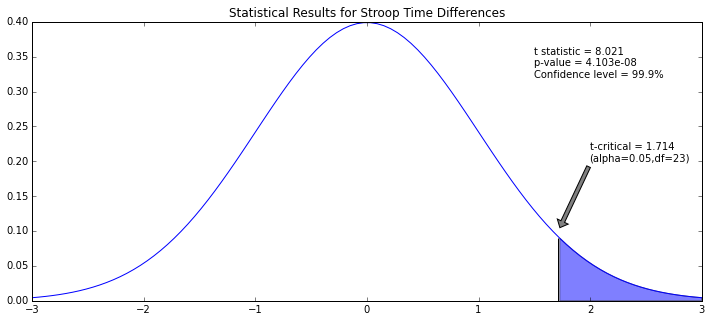

In [104]:
# Display the t-critical and t statistic

fig, ax = plt.subplots(1,1,figsize=(12,5))

mean = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(-3,3,100)
y = mlab.normpdf(x,mean,sigma)

plt.vlines(1.714, 0, 0.09)

section = np.arange(1.714, 3, 1/20.)
plt.fill_between(x[78:100],y[78:100], facecolor='blue', alpha=0.5)
ax.annotate('t statistic = 8.021\np-value = 4.103e-08\nConfidence level = 99.9%', xy=(1.5, 0.1), xytext=(1.5,0.32)) 
ax.annotate('t-critical = 1.714\n(alpha=0.05,df=23)', xy=(1.714, 0.1), xytext=(2.0,0.2),
            arrowprops=dict(facecolor='grey', shrink=0.05),) 

plt.title('Statistical Results for Stroop Time Differences')
plt.plot(x,y)

plt.show()

